# Scikit-Learn 맛보기
### Iris 분류 - 결정 트리, 소포트벡터머신(SVM), 로지스틱 회귀

#### ★ 1. 데이터 전처리 (수집, 가공) - 프로그래밍 => 80-90% 

In [47]:
from sklearn.datasets import load_iris
iris = load_iris()

In [16]:
type(iris) # 형태는 dict형태이나, 쓰임새는 object 형태이다.

sklearn.utils.Bunch

In [17]:
iris.keys() # javascript의 object로 정의한 형태와 비슷

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
# Feature data - x data, numpy dimensional array
iris.data[:5]  # iris['data] <- dict일 경우에는 이렇게 작성

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [19]:
type(iris.data), iris.data.shape 

(numpy.ndarray, (150, 4))

In [20]:
# Feature name - type이 list
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
# feature_names를 list로 추출하기 1 - for 문 사용

feature_names =[]
for name in iris_feature_names:
    feature_names.append(name[:-5])

feature_names

['sepal l', 'sepal ', 'petal l', 'petal ']

In [48]:
# feature_names를 list로 추출하기 2 - map과 lambda 함수 사용
iris_feature_names = list(map(lambda s:s[:-5], iris.feature_names))
iris_feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [53]:
# feature_names를 list로 추출하기 3 - 리스트 컴프리헨션 사용
feature_names = [name[:-5] for name in iris_feature_names]
feature_names

['sepal l', 'sepal ', 'petal l', 'petal ']

In [23]:
s = 'sepal length (cm)'
s[:-5]
# 2차원 numpy 슬라이싱 잘 이용하면 편하다.

'sepal length'

In [24]:
# Target data - y
iris.target[:5]

array([0, 0, 0, 0, 0])

In [25]:
import numpy as np
np.unique(iris.target, return_counts=True)
# species(품종) -> 숫자로 변환시킨 값 : iris.target

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [52]:
iris.target_names
# 0 : 'setosa', 1 : 'versicolor', 2 : 'virginica'

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names) # 제일 앞에 오는 데이터는 2차원 데이터(column)
df['target'] = iris.target # target는 y값
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [27]:
iris.target_names # target의 종류가 3가지 들어가있다. 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [28]:
# 설명 (description)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
# df.describe() 기초통계량을 표시해줌 == 요약 통계 확인 : 세 가지 품종이 섞여서 나타남

df.groupby('target').describe() # 품종 별로 구분해서 나타남 groupby로 묶어서 사용하면 유용하다.
# 

sepal length (cm)                                              \
                   count   mean       std  min    25%  50%  75%  max   
target                                                                 
0                   50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                   50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

       sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                  count   mean  ...               75%  max            count   
target                          ...                                           
0                  50.0  3.428  ...             1.575  1.9             50.0   
1                  50.0  2.770  ...             4.600  5.1             50.0   
2                  50.0  2.974  ...             5.875  6.9             50.0   

                                                  
         mean       std  min  25%  50%  75%  max  
target                                            
0       0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1       1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2       2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [54]:
df.groupby('target').agg(['mean', 'std'])

sepal length (cm)           sepal width (cm)            \
                    mean       std             mean       std   
target                                                          
0                  5.006  0.352490            3.428  0.379064   
1                  5.936  0.516171            2.770  0.313798   
2                  6.588  0.635880            2.974  0.322497   

       petal length (cm)           petal width (cm)            
                    mean       std             mean       std  
target                                                         
0                  1.462  0.173664            0.246  0.105386  
1                  4.260  0.469911            1.326  0.197753  
2                  5.552  0.551895            2.026  0.274650

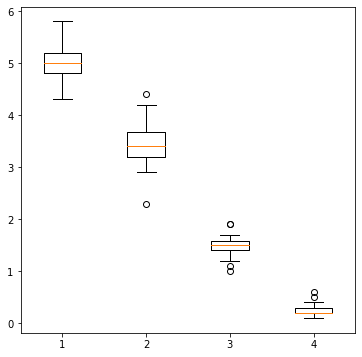

In [30]:
# boxplot사용해서 4분위 수 구하기
import matplotlib.pyplot as plt
setosa = df[df.target == 0].iloc[:,:-1]
plt.figure(figsize=(6,6))
plt.boxplot(setosa)
plt.show()

In [31]:
df.target.value_counts()

# np.unique(iris.target, return_counts=True)와 같은 의미


0    50
1    50
2    50
Name: target, dtype: int64

#### 2. 학습과 테스트 데이터로 분리 - 모델링 => 10-20%

학습을 한 데이터와 테스트 데이터는 분리해야 한다.

그렇지 않으면, 학습이 아니라 암기한 데이터를 도출한다. => 효과 X

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=2021 # test_size가 설정 X => 25% default 
)                                                            # 총 데이터 150건 중 training은 120건, test는 30건 => 개인마다 정확도가 달라질 수 있어 동일하게 설정

X_train.shape, X_test.shape, y_train.shape, y_test.shape # 80%는 train, 20%는 test
# sklearn에서 X에 들어오는 데이터는 무조건 2차원 데이터(행이 120 열이 4개) => X는 대문자
#             y는 1차원 데이터 => y는 소문자
#             de facto standard => 사실상 표준

((120, 4), (30, 4), (120,), (30,))

In [57]:
# random_state 설명 == numpy의 랜덤 모듈
np.random.seed(2021) # 같은 랜덤 값 생성, 어떤 값을 데이터로 취하느냐에 따라 정확도가 개인마다 달라질 수 있다. 
np.random.randint(0,101,10) # 각자 다른 값이 생성

array([85, 57,  0, 94, 86, 44, 62, 91, 29, 21])

In [33]:
np.unique(y_train, return_counts=True) # random으로 뽑아낸 것이기 때문에 불균형이 발생한다. 
# return_counts = True 설정시 고유 값 배열의 튜플과 각 고유 값의 개수 배열을 제공

(array([0, 1, 2]), array([36, 40, 44], dtype=int64))

In [34]:
# y값을 균일하게 뽑으려면 ==> stratify 옵션 사용 
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=2021
)
np.unique(y_train, return_counts=True) # target 별로 균일하게 데이터 추출 
# np.unique : 주어진NumPy 배열의 모든 고유 값을 검색하고 이러한 고유 값을 정렬

(array([0, 1, 2]), array([40, 40, 40], dtype=int64))

#### 3. 학습


- Decision Tree ( 결정 트리 모델)


In [35]:
from sklearn.tree import DecisionTreeClassifier # 대문자니까 Class 
                                                    # 학습 하기위해서는 모델을 생성해야 한다. 


In [36]:
# 모델 생성 - 객체 생성
dtc = DecisionTreeClassifier(random_state=2021)

    # estimator ( dataset ) - sklearn의 모듈에서 class, func이 속해있는 족보가 중요하다.
        # - Classifier ( model_selection )
        # - Regressor ( tree )

In [58]:
# hyper parameter을 조절하면, 성능을 개선시킬 수 있다. 
    # 어떤 parameter을 어떤 용도로 사용하느냐가 인공지능 학습의 핵심
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2021,
 'splitter': 'best'}

In [37]:
# 학습(훈련) - fit 메소드 
    # 데이터와 정보를 주고 학습을 하라는 의미 
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

#### 4. 예측

In [38]:
# predict 메소드를 사용해서 예측해보기
pred_dt = dtc.predict(X_test)
# 데이터의 개수 대로, 결과가 출력된다.

In [59]:
# 30개의 데이터가 출력
pred_dt

array([0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       0, 2, 1, 0, 1, 1, 2, 0])

- 대표적으로 DF을 만드는 3가지 방법    
    - 2차원 데이터(type은 상관없음)를 주고, column name을 설정함
    - dict를 가지고 DF를 만들 수 있음 {"컬럼명":<1차원 데이터 - 리스트, np.array>}
    - list에 개별 dict가 들어옴 [{key:value}, {key:value}] 

In [39]:
res = pd.DataFrame({'y':y_test, 'DT':pred_dt}) # res == result
res.head()
# 2번째 인덱스 y=1, DT=2 ==> 불일치 ==> 정확도가 80%

y  DT
0  0   0
1  1   1
2  1   2
3  2   2
4  0   0

#### 5. 평가

In [40]:
# 정확도
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred_dt) # acc == accuracy_score 
                                        # 정밀도, 재현율이라고 하는 평가지표가 있음 => (y_test, pred_dt)의 순서가 중요하다.
print(f"정확도(DT): {acc:.4f}") # 소수점 4자리까지 출력

정확도(DT): 0.9000


In [41]:
# 4, 5번을 한꺼번에 수행
    # 정확도만 구하고 싶다면 score 메소드를 사용
dtc.score(X_test, y_test)

0.9

- Support Vector Machine (SVM)
    - 트리 모델과 차이점

In [61]:
# 3) 모델 생성 및 학습
from sklearn.svm import SVC
svc = SVC(random_state=2021)
svc.fit(X_train, y_train)

SVC(random_state=2021)

In [64]:
# 4) 예측 
pred_sv = svc.predict(X_test)

In [66]:
# 5) 평가
accuracy_score(y_test, pred_sv), svc.score(X_test, y_test)

(0.9, 0.9)

- logistic Regression 논리 회귀

In [67]:
# 3) 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(max_iter=500, random_state=2021)
lrc.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=2021)

In [68]:
# 4) 예측
pred_lr = lrc.predict(X_test)

In [70]:
# 5) 평가
accuracy_score(y_test, pred_lr), lrc.score(X_test, y_test)

(0.9333333333333333, 0.9333333333333333)

In [42]:
# 참고사항 : f-string ( 문자열과 함께 써도 무방 )
a = 1
b = 1.0
c = '문자열'
print(a, b, c)

1 1.0 문자열


In [43]:
print('정수:', a, ', 실수:', b, ',', c, '"1"')

정수: 1 , 실수: 1.0 , 문자열 "1"


In [44]:
print(f'정수: {a:03d}, 실수: {b}, {c}: "1"')

정수: 001, 실수: 1.0, 문자열: "1"


In [45]:
# formatting 
print(f'정수: {a:03d}, 실수: {b:.2f}, {c}: "1"') # d == 앞에 세자리수로 찍어라. 숫자가 없으면 0
                                                 # f == 소수점 두 자리수를 찍어라.

정수: 001, 실수: 1.00, 문자열: "1"


In [46]:
print(f'정수: {a:03d}, 실수: {b:.2f}, {c:10s}: "1"') # s == 10칸 띄어쓰기

정수: 001, 실수: 1.00, 문자열       : "1"
